In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('nonanonymous_data.csv')
data.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


# Feature Selection

In [21]:
feature_data = data.drop(columns=['status', 'accident_index', 'accident_year', 'lsoa_of_casualty'])

In [23]:
accidents = feature_data.groupby('accident_reference')
print('Number Of Accidents: ',len(accidents))

Number Of Accidents:  48283


In [24]:
accidents.get_group('070154696')

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
2,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%
3,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%
4,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%
5,070154696,4,4,Driver/Rider,Male,52.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%
6,070154696,4,5,Passenger,Male,50.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
7,070154696,4,6,Passenger,Male,16.0,16 - 20,Slight,Not a pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN


# Missing Values

In [25]:
feature_data.isna().sum()

accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
dtype: int64

In [15]:
def find_multiple_missing(df, n=1): 
    indices = list()
    for i, j in df.iterrows():
        if j.isna().sum() == n:
            indices.append(i)
    return indices

In [31]:
for i in range(1, 10):
    indices = find_multiple_missing(feature_data, i)
    print(f'number of records with {i} missing values: {len(indices)}')
    with open(f'{i} missing values.txt', 'w') as f:
        f.write('\n'.join(map(str, indices)))

number of records with 1 missing values: 772
number of records with 2 missing values: 5436
number of records with 3 missing values: 298
number of records with 4 missing values: 448
number of records with 5 missing values: 111
number of records with 6 missing values: 0
number of records with 7 missing values: 0
number of records with 8 missing values: 0
number of records with 9 missing values: 0


In [12]:
one_missing_indices = list()
with open('1 missing values.txt', 'r') as f:
    for i in f.readlines():
        one_missing_indices.append(int(i.replace('\n', '')))

In [37]:
feature_data.iloc[one_missing_indices, :].isna().sum()

accident_reference                      0
vehicle_reference                       0
casualty_reference                      0
casualty_class                          0
sex_of_casualty                       155
age_of_casualty                         0
age_band_of_casualty                    0
casualty_severity                       0
pedestrian_location                     0
pedestrian_movement                     0
car_passenger                         232
bus_or_coach_passenger                  9
pedestrian_road_maintenance_worker     92
casualty_type                           3
casualty_home_area_type                 0
casualty_imd_decile                   281
dtype: int64

In [13]:
two_missing_indices = list()
with open('2 missing values.txt', 'r') as f:
    for i in f.readlines():
        two_missing_indices.append(int(i.replace('\n', '')))
feature_data.iloc[two_missing_indices, :].isna().sum() / len(two_missing_indices)

accident_reference                    0.000000
vehicle_reference                     0.000000
casualty_reference                    0.000000
casualty_class                        0.000000
sex_of_casualty                       0.000000
age_of_casualty                       0.106144
age_band_of_casualty                  0.106144
casualty_severity                     0.000000
pedestrian_location                   0.000000
pedestrian_movement                   0.000000
car_passenger                         0.000368
bus_or_coach_passenger                0.000000
pedestrian_road_maintenance_worker    0.000000
casualty_type                         0.000000
casualty_home_area_type               0.893488
casualty_imd_decile                   0.893856
dtype: float64

In [40]:
feature_data.to_csv('feature_data.csv', index=False)

In [9]:
feature_data = pd.read_csv('feature_data.csv')

In [4]:
five_missing_indices = list()
with open('5 missing values.txt', 'r') as f:
    for i in f.readlines():
        five_missing_indices.append(int(i.replace('\n', '')))
        
feature_data.iloc[five_missing_indices, :]

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
65,161138447,1,1,Driver/Rider,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Motorcycle 125cc and under rider or passenger,NaN,NaN
619,371146615,2,1,Passenger,Female,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,NaN,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
643,010380037,1,2,Pedestrian,NaN,NaN,NaN,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,NaN,NaN
1325,461154914,1,1,Driver/Rider,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Motorcycle - unknown cc rider or passenger,NaN,NaN
2224,361142795,1,1,Driver/Rider,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,NaN,NaN
2683,461161289,1,1,Driver/Rider,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,NaN,NaN
3416,501171778,1,1,Driver/Rider,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
4277,010383219,2,1,Driver/Rider,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,NaN,NaN
4322,010373323,2,2,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,unknown (self reported),Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
4323,010373323,2,3,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,unknown (self reported),Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN


In [6]:
display(len(feature_data))
feature_data.drop(five_missing_indices, axis='index', inplace=True)
display(len(feature_data))

61352

61241

In [10]:
four_missing_indices = list()
with open('4 missing values.txt', 'r') as f:
    for i in f.readlines():
        four_missing_indices.append(int(i.replace('\n', '')))
feature_data.iloc[four_missing_indices, :]

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
241,201179119,2,1,Driver/Rider,Male,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
242,201179119,2,2,Passenger,Male,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
246,201179619,1,1,Pedestrian,Male,NaN,NaN,Slight,Crossing elsewhere within 50m. of pedestrian c...,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Not Known,Pedestrian,NaN,NaN
337,161185027,3,2,Passenger,Female,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
505,161226695,2,1,Driver/Rider,Male,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,NaN,NaN
506,161231480,1,1,Passenger,Female,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Boarding,No / Not applicable,Bus or coach occupant (17 or more pass seats),NaN,NaN
507,161231510,1,1,Passenger,Female,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Alighting,No / Not applicable,Bus or coach occupant (17 or more pass seats),NaN,NaN
579,201200078,2,1,Driver/Rider,Male,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
606,201213943,1,1,Driver/Rider,Female,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
652,010380117,1,2,Passenger,Male,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,unknown (self reported),Not a bus or coach passenger,No / Not applicable,Taxi/Private hire car occupant,NaN,NaN


In [11]:
three_missing_indices = list()
with open('3 missing values.txt', 'r') as f:
    for i in f.readlines():
        three_missing_indices.append(int(i.replace('\n', '')))
feature_data.iloc[three_missing_indices, :]

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
540,010379392,1,2,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%
554,010379713,1,2,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 40-50%
928,302200105,1,2,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%
1545,351202934,1,3,Passenger,Male,47.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,NaN,No / Not applicable,Bus or coach occupant (17 or more pass seats),NaN,NaN
1705,361165511,1,5,Passenger,Female,8.0,6 - 10,Slight,Not a pedestrian,Not a Pedestrian,NaN,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
1787,461172560,1,1,Passenger,Female,47.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,NaN,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN
2209,461166612,1,1,Passenger,Male,83.0,Over 75,Serious,Not a pedestrian,Not a Pedestrian,Not car passenger,NaN,No / Not applicable,Bus or coach occupant (17 or more pass seats),NaN,NaN
4365,010383824,1,2,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%
4525,010373733,1,2,Passenger,NaN,NaN,NaN,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
4601,131166897,1,1,Pedestrian,Male,52.0,46 - 55,Slight,"In carriageway, not crossing",Unknown or other,Not car passenger,Not a bus or coach passenger,NaN,Pedestrian,NaN,NaN


In [14]:
drop_indices = two_missing_indices + three_missing_indices + four_missing_indices + five_missing_indices
no_missing_data = feature_data.drop(drop_indices, axis='index',)
display(len(feature_data), len(no_missing_data))

61352

55059

## missing values of sex_of_casualty

In [37]:
# handling missings of sex_of_casualty
filling_value_sex = no_missing_data.sex_of_casualty.mode()[0]
no_missing_data.sex_of_casualty.fillna(filling_value_sex, inplace=True)

## missing values of car_passenger

In [39]:
no_missing_data.car_passenger.mode()

0    Not car passenger
dtype: object

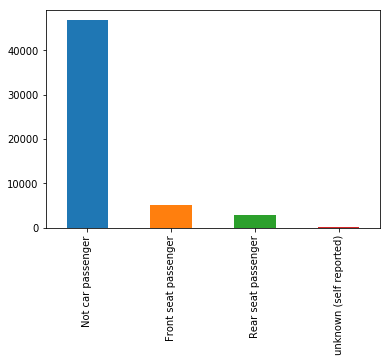

In [41]:
no_missing_data.car_passenger.value_counts().plot.bar()

In [43]:
no_missing_data.car_passenger.fillna(no_missing_data.car_passenger.mode()[0], inplace=True)

## missing values of bus_or_coach_passenger

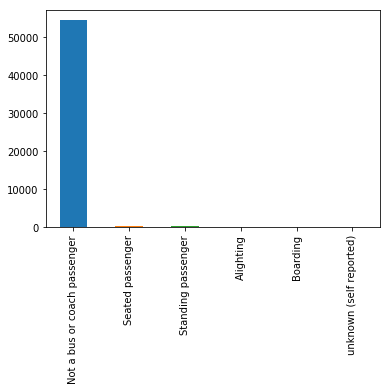

In [44]:
no_missing_data.bus_or_coach_passenger.value_counts().plot.bar()

In [46]:
no_missing_data.bus_or_coach_passenger.fillna(no_missing_data.bus_or_coach_passenger.mode()[0], inplace=True)

## missing values of pedestrian_road_maintenance_worker

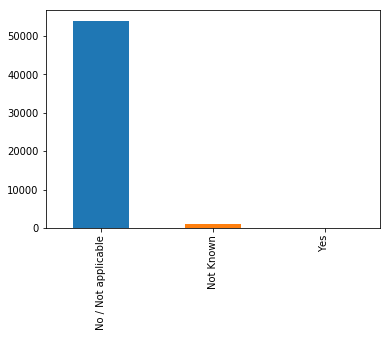

In [47]:
no_missing_data.pedestrian_road_maintenance_worker.value_counts().plot.bar()

In [49]:
no_missing_data.pedestrian_road_maintenance_worker.fillna(
    no_missing_data.pedestrian_road_maintenance_worker.mode()[0], inplace=True
)

## missing values of casualty type

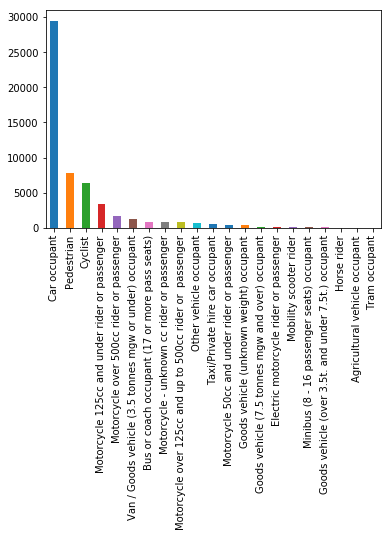

In [50]:
no_missing_data.casualty_type.value_counts().plot.bar()

In [51]:
no_missing_data.casualty_type.fillna(
    no_missing_data.casualty_type.mode()[0], inplace=True
)

## missing values of casualty_imd_decile

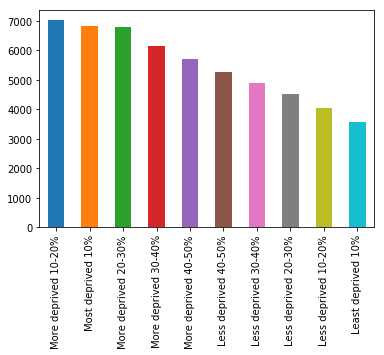

In [52]:
no_missing_data.casualty_imd_decile.value_counts().plot.bar()

In [53]:
imd_decile_indices = no_missing_data.casualty_imd_decile.isna()

In [55]:
imd_decile_indices.sum()

281

In [59]:
no_missing_data = no_missing_data.loc[~imd_decile_indices]

In [60]:
no_missing_data.isna().sum()

accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [61]:
no_missing_data.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%
1,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%
2,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%
3,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%
4,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%


In [62]:
no_missing_data.to_csv('no_missing_data.csv', index=False)